In [1]:
import pandas as pd
import numpy as np
import json

In [110]:
def acquire_data():

    # Creating list to loop and store the new dataframes
    json_list = ['data1', 'data2', 'data3', 'data4', 'data5', 'data6', 'data7', 'data8', 'data9', 'data10', 'data11', 'data12', 'data13']
    df_list = []

    # Looping throgh the JSON file names
    for item in json_list:

        # Creating a file_path for each JSON file
        file_path = item + '.json'

        # Opening JSON file
        with open(file_path, 'r') as openfile:

            # Reading from json file
            json_obj = json.load(openfile)

            # Create the dataframe 
            df = pd.DataFrame(json_obj['response']['data'])

            # Append the dataframe to list
            df_list.append(df)

            # Concatinate all the datframes to one dataframe
            df = pd.concat(df_list )
            
            # Change the period field to a datatime type 
            df.period = df.period.astype('datetime64')
            
            # Set the index to datetime
            df = df.set_index('period')
            
            # Acquire only the Texas data
            df = df[(df['stateid']=='TX')]
            
            # Dropping nulls
            # df.dropna(inplace=True)

            # Filter the DataFrame to keep rows where sectorid is 'ALL'
            df = df[df['sectorid'] == 'ALL']

            # Drop specific columns
            columns_to_drop = ['stateDescription', 'sectorid', 'sales', 'customers-units', 'price-units', 'revenue-units', 'sales-units']
            df = df.drop(columns=columns_to_drop, axis=1)
        
    return df



In [111]:
df.columns

Index(['stateid', 'sectorName', 'customers', 'revenue'], dtype='object')

In [112]:
df = acquire_data()
df.head(10)

,stateid,sectorName,customers,price,revenue
period,,,,,
2022-12-01,TX,all sectors,14165102.0,10.59,3640.57303
2022-11-01,TX,all sectors,14103007.0,10.32,3261.20369
2022-10-01,TX,all sectors,14150596.0,10.62,3724.61809
2022-09-01,TX,all sectors,14143584.0,11.06,4588.29493
2022-08-01,TX,all sectors,14150103.0,11.10,5189.53191
2022-07-01,TX,all sectors,14074827.0,11.22,5137.55004
2022-06-01,TX,all sectors,14066846.0,10.64,4540.69476
2022-05-01,TX,all sectors,14048627.0,10.39,3827.29089
2022-04-01,TX,all sectors,14000971.0,9.44,3070.56894


In [113]:
df.isnull().sum()

stateid       0
sectorName    0
customers     0
price         0
revenue       0
dtype: int64

<Axes: xlabel='period'>

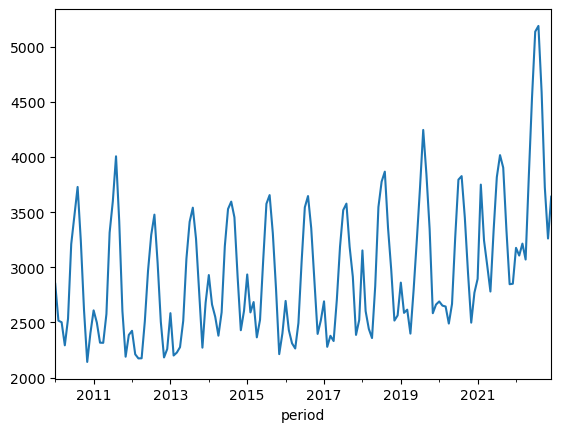

In [114]:
df.revenue.plot()

<Axes: xlabel='period'>

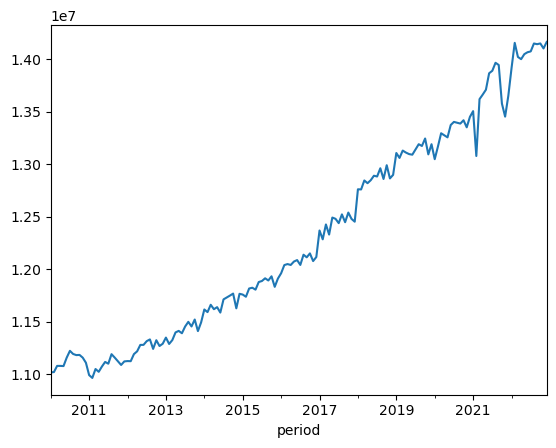

In [115]:
df.customers.plot()

<Axes: xlabel='period'>

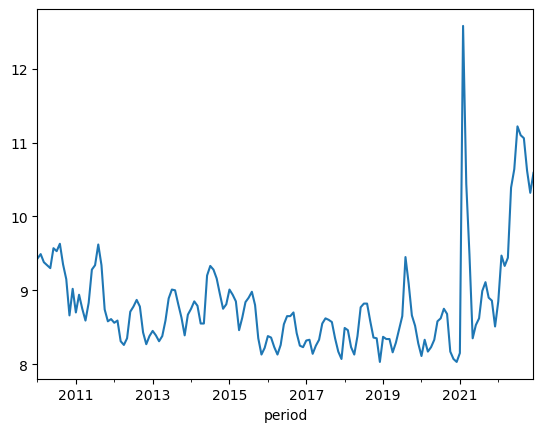

In [116]:
df.price.plot()

In [99]:
# len(df[df['stateid']=='TX'])

In [23]:
# df_tx = df[(df['stateid']=='TX')]

In [100]:
# len(df_tx)

In [98]:
# df_tx.head(10)

In [101]:
# len(df_tx)

In [102]:
# df_tx.isnull().sum()

In [103]:
# df_tx.dropna(inplace=True)

In [104]:
# df_tx.isnull().sum()

In [105]:
# df_tx[df_tx['sectorid']=='ALL']

,period,stateid,stateDescription,sectorid,sectorName,customers,price,revenue,sales,customers-units,price-units,revenue-units,sales-units
267,2022-12,TX,Texas,ALL,all sectors,14165102.0,10.59,3640.57303,34392.38787,number of customers,cents per kilowatthour,million dollars,million kilowatthours
557,2022-11,TX,Texas,ALL,all sectors,14103007.0,10.32,3261.20369,31594.31497,number of customers,cents per kilowatthour,million dollars,million kilowatthours
896,2022-10,TX,Texas,ALL,all sectors,14150596.0,10.62,3724.61809,35083.61550,number of customers,cents per kilowatthour,million dollars,million kilowatthours
1352,2022-09,TX,Texas,ALL,all sectors,14143584.0,11.06,4588.29493,41503.60488,number of customers,cents per kilowatthour,million dollars,million kilowatthours
1683,2022-08,TX,Texas,ALL,all sectors,14150103.0,11.10,5189.53191,46735.73037,number of customers,cents per kilowatthour,million dollars,million kilowatthours
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2721,2010-05,TX,Texas,ALL,all sectors,11078341.0,9.30,2533.07961,27222.96074,number of customers,cents per kilowatthour,million dollars,million kilowatthours
3026,2010-04,TX,Texas,ALL,all sectors,11079906.0,9.34,2292.33683,24541.76013,number of customers,cents per kilowatthour,million dollars,million kilowatthours
3700,2010-03,TX,Texas,ALL,all sectors,11079822.0,9.38,2501.62093,26681.47664,number of customers,cents per kilowatthour,million dollars,million kilowatthours
3979,2010-02,TX,Texas,ALL,all sectors,11020940.0,9.49,2516.05501,26517.69130,number of customers,cents per kilowatthour,million dollars,million kilowatthours


In [106]:
# df_tx = df[(df['stateid']=='TX')&(df['sectorid']=="RES")]

In [91]:
def acquire_tx_data():

    # Creating list to loop and store the new dataframes
    json_list = ['allsec1', 'allsec2']
    df_list = []

    # Looping throgh the JSON file names
    for item in json_list:

        # Creating a file_path for each JSON file
        file_path = item + '.json'

        # Opening JSON file
        with open(file_path, 'r') as openfile:

            # Reading from json file
            json_obj = json.load(openfile)

            # Create the dataframe 
            df = pd.DataFrame(json_obj['response']['data'])

            # Append the dataframe to list
            df_list.append(df)

            # Concatinate all the datframes to one dataframe
            df = pd.concat(df_list)
            
            # Change the period field to a datatime type 
            df.period = df.period.astype('datetime64')
            
            # Set the index to datetime
            df = df.set_index('period')


            # Drop specific columns
            columns_to_drop = ['location', 'stateDescription', 'sectorid',
                               'sectorDescription', 'fueltypeid', 'ash-content',
                               'ash-content-units', 'cost-per-btu', 'cost-per-btu-units',
                               'heat-content-units',
                               'receipts-btu-units', 'sulfur-content', 'sulfur-content-units',
                               'total-consumption-btu-units']
            df = df.drop(columns=columns_to_drop, axis=1)
        
    return df

In [92]:
df_con = acquire_tx_data()
df_con

,fuelTypeDescription,heat-content,receipts-btu,total-consumption-btu
period,,,,
2022-12-01,petroleum,5.8369,88.51504,1.70354
2022-12-01,wood and wood wastes,0.0000,0.00000,3.29169
2022-12-01,waste oil and other oils,5.8000,0.00000,0.00635
2022-12-01,petroleum liquids,5.8340,88.51504,NaN
2022-12-01,petroleum coke,29.3361,0.00000,0.15261
...,...,...,...,...
2010-01-01,bituminous coal and synthetic coal,0.0000,0.00000,0.00000
2010-01-01,bituminous coal,0.0000,0.00000,0.00000
2010-01-01,"coal, excluding waste coal",15.4977,117599.97286,133.11257


In [82]:
df_con.isnull().sum()

heat-content             324
receipts-btu             405
total-consumption-btu    350
dtype: int64

In [84]:
def acquire_tx_data_2():

    # Creating list to loop and store the new dataframes
    json_list = ['allsec1', 'allsec2']
    df_list = []

    # Looping throgh the JSON file names
    for item in json_list:

        # Creating a file_path for each JSON file
        file_path = item + '.json'

        # Opening JSON file
        with open(file_path, 'r') as openfile:

            # Reading from json file
            json_obj = json.load(openfile)

            # Create the dataframe 
            df = pd.DataFrame(json_obj['response']['data'])

            # Append the dataframe to list
            df_list.append(df)

            # Concatinate all the datframes to one dataframe
            df = pd.concat(df_list)
            
            # Change the period field to a datatime type 
            df.period = df.period.astype('datetime64')
            
            # Set the index to datetime
            df = df.set_index('period')
            
    return df


In [118]:
df_2 = acquire_tx_data_2()
df_2.head()

,location,stateDescription,sectorid,sectorDescription,fueltypeid,fuelTypeDescription,ash-content,ash-content-units,cost-per-btu,cost-per-btu-units,heat-content,heat-content-units,receipts-btu,receipts-btu-units,sulfur-content,sulfur-content-units,total-consumption-btu,total-consumption-btu-units
period,,,,,,,,,,,,,,,,,,
2022-12-01,TX,Texas,99,All Sectors,PET,petroleum,0.0,percent,NaN,dollars per million Btu,5.8369,Btu per barrels,88.51504,billion Btu,0.0,percent,1.70354,million MMBtu
2022-12-01,TX,Texas,99,All Sectors,WWW,wood and wood wastes,0.0,percent,NaN,dollars per million Btu,0.0000,Btu per physical units,0.00000,billion Btu,0.0,percent,3.29169,million MMBtu
2022-12-01,TX,Texas,99,All Sectors,WOO,waste oil and other oils,0.0,percent,NaN,dollars per million Btu,5.8000,Btu per barrels,0.00000,billion Btu,0.0,percent,0.00635,million MMBtu
2022-12-01,TX,Texas,99,All Sectors,PEL,petroleum liquids,0.0,percent,NaN,dollars per million Btu,5.8340,Btu per barrels,88.51504,billion Btu,0.0,percent,NaN,million MMBtu
2022-12-01,TX,Texas,99,All Sectors,PC,petroleum coke,0.0,percent,0.0,dollars per million Btu,29.3361,Btu per short tons,0.00000,billion Btu,0.0,percent,0.15261,million MMBtu


In [89]:
df_2.fueltypeid.value_counts()

PET    156
FOS    156
REN    156
RFO    156
SPV    156
SUB    156
SUN    156
WAS    156
WND    156
WNT    156
ALL    156
AOR    156
BIO    156
COL    156
COW    156
WWW    156
DFO    156
HYC    156
PC     156
LFG    156
LIG    156
MLG    156
NG     156
NGO    156
NUC    156
OB2    156
OBW    156
OOG    156
WOO    156
PEL    156
ORW    156
OTH    156
TSN    108
TPV    108
DPV    108
RC      72
BIS     60
BIT     60
STH      1
Name: fueltypeid, dtype: int64

In [117]:
import csv

# Open the text file in read mode
with open('household_power_consumption.txt', 'r') as file:
    # Create a CSV reader object
    reader = csv.reader(file, delimiter=',')

    # Iterate through the rows and process the data
    for row in reader:
        # Each row is a list of values
        print(row)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

